Bytes: iVBORw0KGgoAAAANSUhEUgAAAd8AAAFKCAYAAABcq1WoAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3Xd0VPedNvBnitqoazSqIAmENKIbMEVgejPIqFIkVuv1OeSsE8d2ko1DiE8c+7w+J44NmzeOd9+1TTbexF4L2UKAQBQZjBsWohoDshpCQg1pRr1ryn3/cJAtq0szc6c8n//mtvn+mBk9zL3fuT+JIAgCiIiIyGKkYhdARETkaBi+REREFsbwJSIisjCGLxERkYUxfImIiCyM4UtERGRhcks8iUbTbvJj+voq0NzcZfLjiskexwTY57g4Jtthj+OyxzEB9jculcpz2HU2+81XLpeJXYLJ2eOYAPscF8dkO+xxXPY4JsB+xzUUmw1fIiIiW8XwJSIisjCGLxERkYUxfImIiCyM4UtERGRhDF8iIiILY/gSERFZGMOXiIjIwixyhysiIiJrVVBYj9z8CtRquxDir0BcbASWzgo063MyfImIyGEVFNbjrZzb/Y+rNZ39j80ZwDztTEREDis3v2KY5ZVmfV6GLxEROaxa7dATOdQ1dpr1eRm+RETksEL8FUMuD1a6m/V5Gb5EROSw4mIjhlkebtbnZcMVERE5rAdNVbn5lahr7ESw0h1xseHsdiYiIjKnpbMCzR62P8TTzkRERBbG8CUiIrIwhi8REZGFMXyJiIgsbEwNV6+99hquXr0KvV6PJ598EnPnzsXevXthMBigUqmwf/9+ODs7m7tWIiIiuzBq+F68eBGlpaXIzMxEc3MzkpKSEBsbi927d2PLli344x//iKysLOzevdsS9RIREdm8UU87L168GK+//joAwMvLC93d3SgoKMD69esBAGvXr

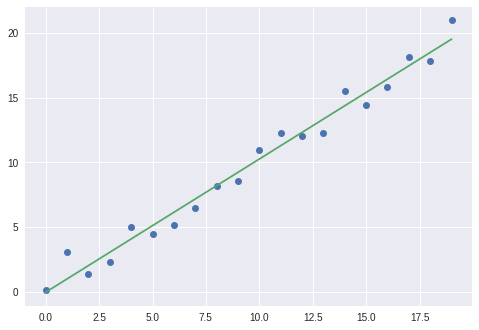

In [4]:
# Send alert via SIGNL4 (REST API)

import matplotlib.pyplot as plt
import numpy as np
import base64
from IPython.display import Image

# SIGNL4 API Key
apiKey = 'ENTER YOUR SIGNL4 API KEY HERE';

# Create sample diagram
x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

plt.savefig('plot1.png', bbox_inches='tight')
#display(Image('plot1.png'))

import requests
import tensorflow as tf
import sys

# Encode image as base64
with open('plot1.png', 'rb') as f:
    img_data = f.read()

base64Image = base64.b64encode(img_data)
base64Image = base64Image.decode('utf-8')

print('Bytes: %s' % (base64Image))

# Assemble header information for SIGNL4 webhook
headers = {'content-type': 'application/json', 'Authorization': 'Bearer ' + apiKey}

# Assemple SIGNL4 alert data
json = {
  "externalId": "1",
  "category": "none",
  "severity": 0,
  "attachments": [
    {
      "id": "0",
      "encoding": 1,
      "name": "image",
      "contentType": "image/png",
      "content": base64Image
    }
  ],
  "parameters": [
    {
      "name": "Big Data",
      "type": 0,
      "value": "Stack overflow detected by TensorFlow."
    }
  ],
  "title": "TensorFlow",
  "text": "TensorFlow Alert",
  "flags": 0
}

# Send request to SIGNL4 webhook
r = requests.post('https://connect.signl4.com/api/alerts', headers=headers, json=json)
print(r.status_code)
print(r.headers)
#print(r.headers['content-type'])
print(r.text)


In [5]:
# Send alert via SIGNL4 (Simple Webhook)

# Send a SIGNL4 alert from TensorFlow
import requests
#import tensorflow as tf
import sys

# SIGNL4 URL with team secret
urlSIGNL4 = 'https://connect.signl4.com/webhook/<team-secret>'

# Send request to SIGNL4 webhook
r = requests.post(urlSIGNL4, "{'Alert': 'TensorFlow', 'Description': 'Abnormal behavior detected.'}")
print(r.status_code)
print(r.headers)
#print(r.headers['content-type'])
print(r.text)


201
{'Transfer-Encoding': 'chunked', 'Content-Type': 'application/json; charset=utf-8', 'Server': 'Microsoft-HTTPAPI/2.0', 'Request-Context': 'appId=cid-v1:626af396-eb61-4c3e-8dba-e2f6d50248d7', 'X-RateLimit-Limit': '150', 'X-RateLimit-Remaining': '148', 'X-RateLimit-Reset': '1550230620', 'Date': 'Fri, 15 Feb 2019 11:36:46 GMT'}
{
  "eventId": "2518520701929110471_8005eb92-aca3-4e8c-82e5-412301dd2c29"
}
